In [185]:
# numpy, pandas, scipy, math, matplotlib 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import metrics

In [3]:
credit = pd.read_csv(r'C:\Users\MICHAEL\Desktop\Big Data\Módulo 5\Preparar y Explorar los datos\default of credit card clients.csv', sep=',', header =1)

In [4]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Elimiknación de la columna ID 
del credit['ID']

#Renombrar la columna PAY_0 a PAY_1
credit = credit.rename(columns={'PAY_0': 'PAY_1'})
credit = credit.rename(columns={'default payment next month': 'PAY_NEXT_MONTH'})

In [6]:
#Agrpación de edades en Rangos 18-30, 31-40, 41-50, 51-60, 61-70, 71-100
bins = [18,30,40,50,60,70,100]
names = [1, 2, 3, 4, 5, 6]
credit["AGE"] = pd.cut(credit["AGE"], bins, labels = names)


In [7]:
credit.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null category
PAY_1             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-nu

In [8]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_NEXT_MONTH
0,20000,2,2,1,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,1,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,2,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,4,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_NEXT_MONTH
0,20000,2,2,1,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,1,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,2,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,4,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,2,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,3,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,2,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,3,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Visualizaciones

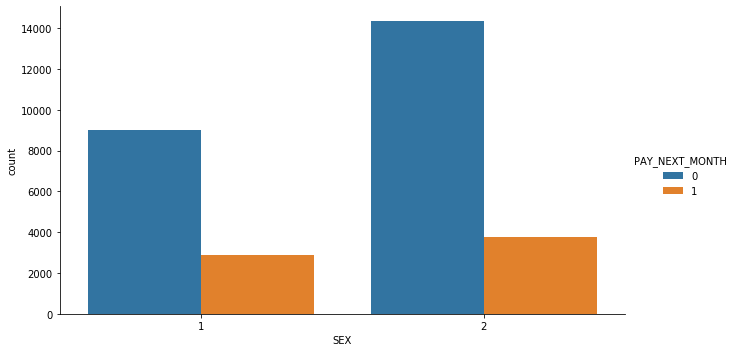

In [69]:
gEdu = sns.factorplot('SEX', data=credit, hue='PAY_NEXT_MONTH', kind='count', aspect=1.75)
gEdu.set_xlabels('SEX')

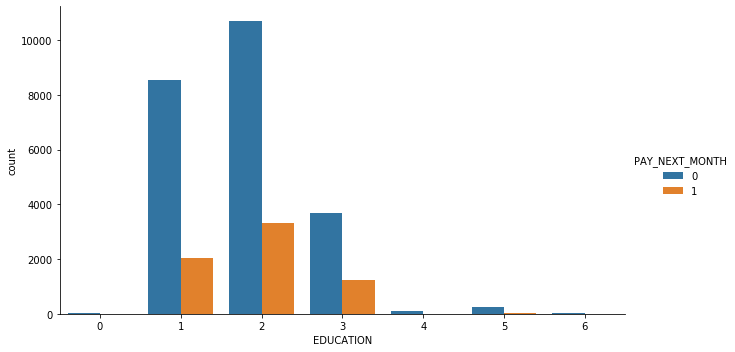

In [65]:
gEdu = sns.factorplot('EDUCATION', data=credit, hue='PAY_NEXT_MONTH', kind='count', aspect=1.75)
gEdu.set_xlabels('EDUCATION')

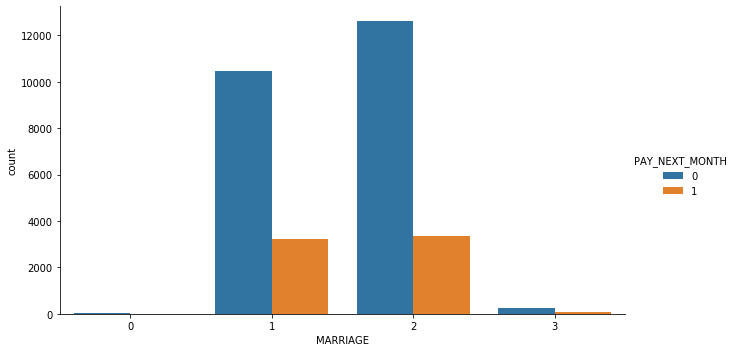

In [66]:
gEdu = sns.factorplot('MARRIAGE', data=credit, hue='PAY_NEXT_MONTH', kind='count', aspect=1.75)
gEdu.set_xlabels('MARRIAGE')

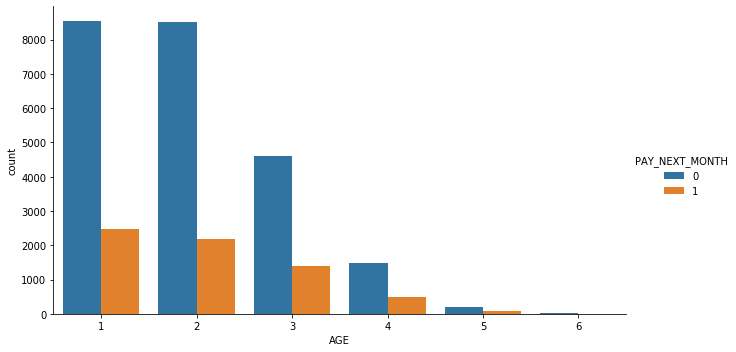

In [67]:
gEdu = sns.factorplot('AGE', data=credit, hue='PAY_NEXT_MONTH', kind='count', aspect=1.75)
gEdu.set_xlabels('AGE')

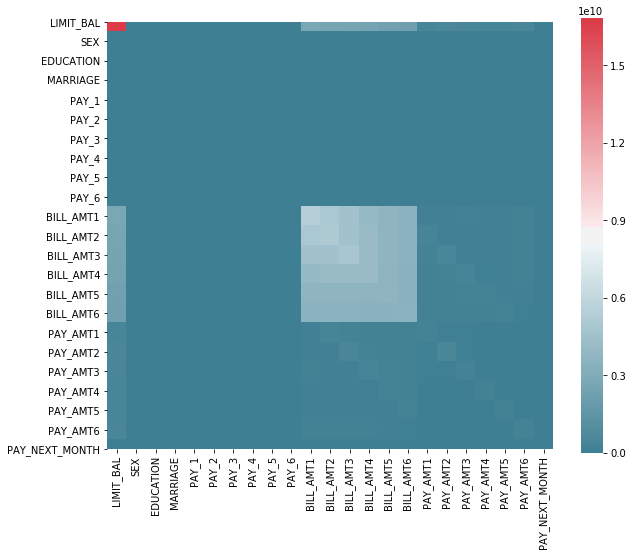

In [58]:
covMat = credit.cov () 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(covMat, mask=np.zeros_like(covMat, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

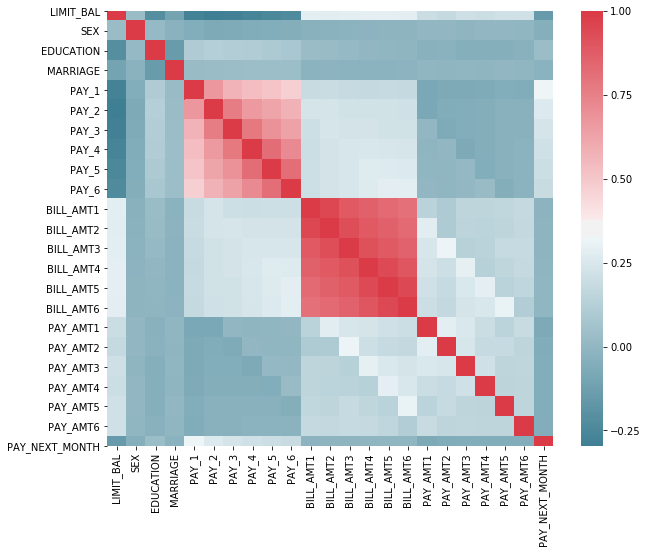

In [59]:
corrMat = credit.corr () 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrMat, mask=np.zeros_like(corrMat, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=False, ax=ax)

# Train and Test data

In [10]:
X = credit.iloc[:, 0:23].values
y = credit.iloc[:, 23].values

In [11]:
#Dividir el set de datos en train and test: 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [143]:
Str_train = "train :" + str(len(X_train))
Str_test = "test :" + str(len(X_test))
print(Str_train)
print(Str_test)

train :24000
test :6000


# Modelo Random Forest

In [191]:
#Asignación de modelo Random Forest a la variable RFcredit
RFcredit = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, min_samples_split=5)

#Entrenamiento del modelo
RFcredit.fit(X_train, y_train)

#Generar Predicciones
y_pred = RFcredit.predict(X_test)

In [192]:
#Validación con 
print (cross_val_score (RFcredit, X_train, y_train)) 

[0.81666667 0.82354167 0.816875   0.81708333 0.81541667]


In [193]:
#Calificación de rendimiento
RFcredit.score(X_train,y_train)

0.85175

In [194]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8286666666666667


# Modelo Support vector Machine

In [42]:
#Asignación de modelo Random Forest a la variable RFcredit
SVMcredit = SVC(kernel='linear', decision_function_shape='ovo', degree=2, random_state=0)

#Entrenamiento del modelo
SVMcredit.fit(X_train, y_train)

#Generar Predicciones
y_pred = SVMcredit.predict(X_test)

In [43]:
#Validación con 
print (cross_val_score (SVMcredit, X_train, y_train)) 

[0.78166667 0.78125    0.78020833 0.780625   0.780625  ]


In [44]:
#Calificación de rendimiento
SVMcredit.score(X_train,y_train)

0.781625

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7908333333333334


# Modelo Neural Network

In [17]:
#Asignación de modelo Random Forest a la variable RFcredit
NNcredit = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)

#Entrenamiento del modelo#
NNcredit.fit(X_train, y_train)

#Generar Predicciones
y_pred = NNcredit.predict(X_test)

In [18]:
#Validación con 
print (cross_val_score (NNcredit, X_train, y_train)) 

[0.54916667 0.22270833 0.2225     0.77479167 0.22604167]


In [19]:
#Calificación de rendimiento
NNcredit.score(X_train,y_train)

0.5915

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5901666666666666


# Modelo K Neighbors

In [38]:
#Asignación de modelo Random Forest a la variable KNcredit
KNcredit = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=10, p=1)

#Entrenamiento del modelo
KNcredit.fit(X_train, y_train)

#Generar Predicciones
y_pred = KNcredit.predict(X_test)

In [39]:
#Validación con 
print (cross_val_score (KNcredit, X_train, y_train)) 

[0.74833333 0.75708333 0.74875    0.75958333 0.75291667]


In [40]:
#Calificación de rendimiento
KNcredit.score(X_train,y_train)

0.8199166666666666

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7611666666666667


# Ajuste RFE sobre el modelo mas eficiente

In [195]:
RFrfe = RFE(RFcredit, 15)

In [197]:
RFrfe = RFrfe.fit(X, y)
# imprimir resúmenes para la selección de atributos 
print (RFrfe.support_) 
print (RFrfe.ranking_)

[ True False False False False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False False False]
[1 9 7 8 6 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 5 4]


In [198]:
Xrfe = credit.iloc[:,[0,5,6,7,8,9,10,11,12,13,15,16,17,18,19]].values
yrfe = credit.iloc[:, 23].values

In [199]:
#Dividir el set de datos en train and test: 80% y 20%
Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(Xrfe, yrfe, test_size=0.2, random_state=0)

In [200]:
Str_train = "train :" + str(len(Xrfe_train))
Str_test = "test :" + str(len(Xrfe_test))
print(Str_train)
print(Str_test)

train :24000
test :6000


In [201]:
#Asignación de modelo Random Forest a la variable RFcredit
RFrfe_credit = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, min_samples_split=5)

#Entrenamiento del modelo
RFrfe_credit.fit(Xrfe_train, yrfe_train)

#Generar Predicciones
yrfe_pred = RFrfe_credit.predict(Xrfe_test)

In [202]:
#Validación con 
print (cross_val_score (RFrfe_credit, Xrfe_train, yrfe_train)) 

[0.81354167 0.823125   0.81645833 0.81520833 0.81333333]


In [203]:
#Calificación de rendimiento
RFrfe_credit.score(Xrfe_train,yrfe_train)

0.846375

In [204]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yrfe_test, yrfe_pred))

Accuracy: 0.8293333333333334


# Matriz de confusión

Matriz de confusión
[[4500  203]
 [ 821  476]]


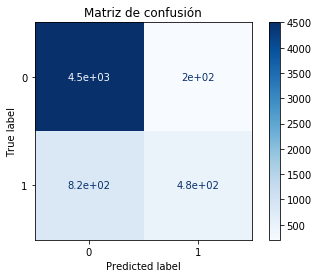

Matriz de confusión normalizada
[[0.95683606 0.04316394]
 [0.63299923 0.36700077]]


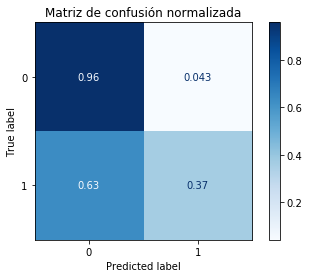

In [190]:
titles_options = [("Matriz de confusión", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RFcredit, Xrfe_test, yrfe_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()